패션 mnist 실습
===

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("./csv_data/fashion-mnist_train.csv")
test_data = pd.read_csv("./csv_data/fashion-mnist_test.csv")

In [44]:
# 데이터 형태 확인
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# 데이터 분리 및 배열화
import numpy as np

y_train= np.array(train_data["label"])
train_data = train_data.drop(columns="label", axis=1)
X_train = np.array(train_data)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=121)

In [46]:
# 데이터 분리 및 배열화
y_test = np.array(test_data["label"])
test_data = test_data.drop(columns="label", axis=1)
X_test = np.array(test_data)

In [47]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [48]:
# 데이터 시각화를 위한 형태 변환
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

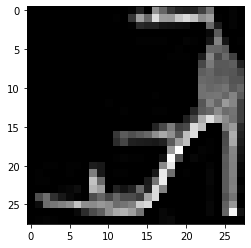

In [49]:
# 시각화 하여 확인
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")
plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 자동완성용 라이브러리 로드
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# seed 값 설정
seed = 121
np.random.seed(seed)
tf.random.set_seed(seed)


# 데이터 로드
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test/ 255


# 모델 저장할 폴더 경로 및 파일명
model_dir = "./fashion_model/"
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

modelpath = "./fashion_model/{epoch:02d}_{val_loss:.4f}.hdf5"

# 체크 포인트 설정, 얼리 스탑 기준 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)


# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
# 일반적으로 CNN에서는 드롭아웃 레이어를 Fully connected network 뒤에 놓지만,
# 상황에 따라서는 max pooling 계층 뒤에 놓기도 한다.
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="CategoricalCrossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# validation_data, callbacks 지정
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=200,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print(f"\n Test Accuracy : {model.evaluate(X_test, y_test)[1]}")

Epoch 1/30
210/210 [==============================] - ETA: 0s - loss: 0.7987 - accuracy: 0.7024
Epoch 1: val_loss improved from inf to 0.49643, saving model to ./fashion_model\01_0.4964.hdf5
210/210 [==============================] - 11s 51ms/step - loss: 0.7987 - accuracy: 0.7024 - val_loss: 0.4964 - val_accuracy: 0.8148
Epoch 2/30
210/210 [==============================] - ETA: 0s - loss: 0.4937 - accuracy: 0.8163
Epoch 2: val_loss improved from 0.49643 to 0.40471, saving model to ./fashion_model\02_0.4047.hdf5
210/210 [==============================] - 12s 56ms/step - loss: 0.4937 - accuracy: 0.8163 - val_loss: 0.4047 - val_accuracy: 0.8524
Epoch 3/30
210/210 [==============================] - ETA: 0s - loss: 0.4210 - accuracy: 0.8440
Epoch 3: val_loss improved from 0.40471 to 0.36162, saving model to ./fashion_model\03_0.3616.hdf5
210/210 [==============================] - 13s 61ms/step - loss: 0.4210 - accuracy: 0.8440 - val_loss: 0.3616 - val_accuracy: 0.8709
Epoch 4/30
210/210 [

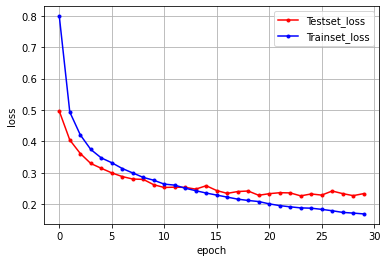

In [51]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()